# House price prediction using multiple regression analysis

# Part 1: Exploratory Data Analysis

The following notebook presents a thought process of predicting a continuous variable through Machine Learning methods. More specifically, we want to predict house prices based on multiple features using regression analysis. 

As an example, we will use a dataset of house sales in King County, where Seattle is located.

In this notebook we will first apply some Exploratory Data Analysis (EDA) techniques to summarize the main characteristics of the dataset.

## 1. Preparation

### 1.1 Load the librairies

In [2]:
!pip install folium

import numpy as np # NumPy is the fundamental package for scientific computing

import pandas as pd # Pandas is an easy-to-use data structures and data analysis tools
pd.set_option('display.max_columns', None) # To display all columns

import matplotlib.pyplot as plt # Matplotlib is a python 2D plotting library
%matplotlib inline 
# A magic command that tells matplotlib to render figures as static images in the Notebook.

import seaborn as sns # Seaborn is a visualization library based on matplotlib (attractive statistical graphics).
sns.set_style('whitegrid') # One of the five seaborn themes
import warnings
warnings.filterwarnings('ignore') # To ignore some of seaborn warning msg

from scipy import stats, linalg

import folium # for map visualization
from folium import plugins

humm, looks like folium isn't available on kaggle. We'll work around it 

### 1.2 Load the dataset

Let's load the data from CSV file using pandas and convert some columns to category type (for better summarization).

In [6]:
data = pd.read_csv("kc_house_data.csv", parse_dates = ['date'])
print(data.head(2))
print('*****')
data['waterfront'] = data['waterfront'].astype('category',ordered=True)
data['view'] = data['view'].astype('category',ordered=True)
data['condition'] = data['condition'].astype('category',ordered=True)
data['grade'] = data['grade'].astype('category',ordered=False)
data['zipcode'] = data['zipcode'].astype(str)
data = data.sort_values('date')
data.head(2) # Show the first 2 lines

           id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0         3       1.00         1180   
1  6414100192 2014-12-09  538000.0         3       2.25         2570   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650     1.0           0     0          3      7        1180   
1      7242     2.0           0     0          3      7        2170   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955             0    98178  47.5112 -122.257   
1            400      1951          1991    98125  47.7210 -122.319   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
*****


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
16768,5561000190,2014-05-02,437500.0,3,2.25,1970,35100,2.0,0,0,4,9,1970,0,1977,0,98027,47.4635,-121.991,2340,35100
9596,472000620,2014-05-02,790000.0,3,2.50,2600,4750,1.0,0,0,4,9,1700,900,1951,0,98117,47.6833,-122.400,2380,4750


In [7]:
data.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront             category
view                   category
condition              category
grade                  category
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                  object
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

## 2. Descriptive statistics

The initial dimension of the dataset

In [8]:
data.shape

(21613, 21)

Let's summarize the main statistics of each parameters

In [9]:
data.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.0,21613.0,21613.0,21613.0,21613.000000,21613.000000,21613.000000,21613.000000,21613,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5.0,5.0,12.0,NaN,NaN,NaN,NaN,70,NaN,NaN,NaN,NaN
top,NaN,2014-06-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,NaN,NaN,98103,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,21450.0,19489.0,14031.0,8981.0,NaN,NaN,NaN,NaN,602,NaN,NaN,NaN,NaN
first,NaN,2014-05-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2015-05-27 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,NaN,NaN,NaN,NaN,1788.390691,291.509045,1971.005136,84.402258,NaN,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,NaN,NaN,NaN,NaN,828.090978,442.575043,29.373411,401.679240,NaN,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,NaN,NaN,NaN,NaN,290.000000,0.000000,1900.000000,0.000000,NaN,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,NaN,NaN,NaN,NaN,1190.000000,0.000000,1951.000000,0.000000,NaN,47.471000,-122.328000,1490.000000,5100.000000


## 3. Setting the context (map visualization)

Before we dive into exploring the data, we’ll want to set the context of the analysis. One good way to do this is with exploratory charts or maps. In this case, we’ll map out the positions of the houses, which will help us understand the problem we’re exploring.

In the below code, we:

* Setup a map centered on King County.
* Add a marker to the map for each house sold in the area.
* Display the map.

In [10]:
houses_map = folium.Map(location = [data['lat'].mean(), data['long'].mean()], zoom_start = 10)
marker_cluster = folium.MarkerCluster().add_to(houses_map)
MAX_RECORDS = 100
for name, row in data.iterrows():
    folium.Marker([row["lat"], row["long"]], 
                  popup="Sold for {0}$ on: {1}. Features: {2} sqft, {3} bedrooms, {4} bathrooms, year built: {5}"\
                  .format(row["price"], row["date"], row['sqft_living'], 
                          row['bedrooms'], row['bathrooms'], row['yr_built'])).add_to(marker_cluster)
    
houses_map.create_map('houses.html')
houses_map

AttributeError: module 'folium' has no attribute 'MarkerCluster'

![houses map][1]

Interactive map is available [here][2]

The map is helpful but it's hard to see where the houses in our dataset are located. Instead, we could make a heatmap:


  [1]: https://harlfoxem.github.io/img/King_County_House_Prediction_files/housesmap.png
  [2]: https://harlfoxem.github.io/houses.html

In [11]:
houses_heatmap = folium.Map(location = [data['lat'].mean(), data['long'].mean()], zoom_start = 9)
houses_heatmap.add_children(plugins.HeatMap([[row["lat"], row["long"]] for name, row in data.iterrows()]))
houses_heatmap.create_map("heatmap.html")
houses_heatmap

AttributeError: 'Map' object has no attribute 'create_map'

![heatmap][1]

(again, map: [here][2])

Heatmaps are good for mapping out gradients, but we’ll want something with more structure to plot out differences in house sale accross the county. Zip codes are a good way to visualize this information.

We could for example compute the mean house price by zip code, then plot this out on a map. In the below code, we'll:

* group the dataframe by zipcode,
* Compute the average price of each column
* add a column with the total number of observations (i.e., house sales) per zipcode


  [1]: https://harlfoxem.github.io/img/King_County_House_Prediction_files/heatmap.png
  [2]: https://harlfoxem.github.io/heatmap.html

In [14]:
data.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
16768,5561000190,2014-05-02,437500.0,3,2.25,1970,35100,2.0,0,0,4,9,1970,0,1977,0,98027,47.4635,-121.991,2340,35100
9596,472000620,2014-05-02,790000.0,3,2.50,2600,4750,1.0,0,0,4,9,1700,900,1951,0,98117,47.6833,-122.400,2380,4750
9587,1024069009,2014-05-02,675000.0,5,2.50,2820,67518,2.0,0,0,3,8,2820,0,1979,0,98029,47.5794,-122.025,2820,48351
20602,7853361370,2014-05-02,555000.0,4,2.50,3310,6500,2.0,0,0,3,8,3310,0,2012,0,98065,47.5150,-121.870,2380,5000
11577,5056500260,2014-05-02,440000.0,4,2.25,2160,8119,1.0,0,0,3,8,1080,1080,1966,0,98006,47.5443,-122.177,1850,9000


In [16]:

zipcode_data = data.groupby('zipcode').aggregate(np.mean)
zipcode_data.reset_index(inplace=True)

data['count'] = 1
count_houses_zipcode = data.groupby('zipcode').sum()

count_houses_zipcode.reset_index(inplace=True)
count_houses_zipcode = count_houses_zipcode[['zipcode','count']]
print(count_houses_zipcode)
data.drop(['count'], axis = 1, inplace = True)

zipcode_data = pd.merge(zipcode_data, count_houses_zipcode, how='left', on=['zipcode'])
zipcode_data.head(5)

   zipcode  count
0    98001    362
1    98002    199
2    98003    280
3    98004    317
4    98005    168
5    98006    498
6    98007    141
7    98008    283
8    98010    100
9    98011    195
10   98014    124
11   98019    190
12   98022    234
13   98023    499
14   98024     81
15   98027    412
16   98028    283
17   98029    321
18   98030    256
19   98031    274
20   98032    125
21   98033    432
22   98034    545
23   98038    590
24   98039     50
25   98040    282
26   98042    548
27   98045    221
28   98052    574
29   98053    405
..     ...    ...
40   98092    351
41   98102    105
42   98103    602
43   98105    229
44   98106    335
45   98107    266
46   98108    186
47   98109    109
48   98112    269
49   98115    583
50   98116    330
51   98117    553
52   98118    508
53   98119    184
54   98122    290
55   98125    410
56   98126    354
57   98133    494
58   98136    263
59   98144    343
60   98146    288
61   98148     57
62   98155    446
63   98166

,zipcode,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,count
0,98001,4.664787e+09,2.808047e+05,3.383978,2.006215,1900.856354,14937.450276,1.429558,1721.325967,179.530387,1980.679558,43.801105,47.309020,-122.270646,1828.856354,11214.403315,362
1,98002,4.850894e+09,2.342840e+05,3.326633,1.839196,1627.743719,7517.633166,1.334171,1522.537688,105.206030,1967.773869,59.889447,47.308780,-122.213357,1479.030151,7585.482412,199
2,98003,4.674182e+09,2.941113e+05,3.357143,2.047321,1928.882143,10603.096429,1.310714,1663.550000,265.332143,1976.885714,21.360714,47.315741,-122.310054,1876.196429,9746.178571,280
3,98004,4.394237e+09,1.355927e+06,3.854890,2.527603,2909.022082,13104.220820,1.432177,2419.842271,489.179811,1971.470032,208.145110,47.616183,-122.205189,2674.700315,12805.022082,317
4,98005,4.961872e+09,8.101649e+05,3.851190,2.424107,2656.803571,19928.785714,1.279762,2160.196429,496.607143,1969.744048,47.630952,47.611532,-122.167268,2567.863095,18367.773810,168


We’ll now be able to plot the average value of a specific attribute for each zip code. In order to do this, we’ll read data in GeoJSON format to get the shape of each zip code, then match each zip code shape with the attribute score. Let's first create a function.

GeoJSON file available [here][1]


  [1]: https://github.com/harlfoxem/House_Price_Prediction/blob/master/zipcode_king_county.geojson

In [17]:
def show_zipcode_map(col):
    geo_path = 'zipcode/zipcode_king_county.geojson'
    zipcode = folium.Map(location=[data['lat'].mean(), data['long'].mean()], zoom_start=9)
    zipcode.geo_json(geo_path = geo_path,
                     data=zipcode_data, 
                     columns = ['zipcode', col], key_on = 'feature.properties.ZCTA5CE10',
                 fill_color='OrRd', fill_opacity=0.9,line_opacity=0.2)
    zipcode.save(col + '.html')
    return zipcode

Now that we have our function ready, let's make a plot using the variable count.

In [18]:
show_zipcode_map('count')

AttributeError: 'Map' object has no attribute 'geo_json'

![count map][1]

Again, map [here][2]

The map helps us understand a few things about the dataset. First, we can see that we don't have data for every zip code in the county. This is especially true for the inner suburbs of Seattle. Second, some zipcodes have a lot more house sales recorded than others. The number of observations range from ~50 to ~600.
Let's show a few more maps:


  [1]: https://harlfoxem.github.io/img/King_County_House_Prediction_files/count.png
  [2]: https://harlfoxem.github.io/count.html

In [19]:
show_zipcode_map('price')
show_zipcode_map('sqft_living')
show_zipcode_map('yr_built')

AttributeError: 'Map' object has no attribute 'geo_json'

![price map][1]

![sqft map][2]

![yr built map][3]

The three interactive maps are available [here][4], [here][5] and [here][6]

We can see that on average, the houses on the eastern suburbs of Seattle are more expensive. They are also bigger in sqft. 

The houses close to the metropolitan are of Seattle are relatively old compare to the houses in the rural area. 


  [1]: https://harlfoxem.github.io/img/King_County_House_Prediction_files/price.png
  [2]: https://harlfoxem.github.io/img/King_County_House_Prediction_files/sqft.png
  [3]: https://harlfoxem.github.io/img/King_County_House_Prediction_files/yrbuilt.png
  [4]: https://harlfoxem.github.io/price.html
  [5]: https://harlfoxem.github.io/sqft_living.html
  [6]: https://harlfoxem.github.io/yr_built.html

## 3. The Output Variable

Now that we've set the context by plotting out where the houses in our dataset are located, we can move into exploring different angles for our regression analysis. 

Let's first display the distribution of the target column (price) using a boxplot.
![boxplot definition][1]


  [1]: https://harlfoxem.github.io/img/King_County_House_Prediction_files/boxplot.png

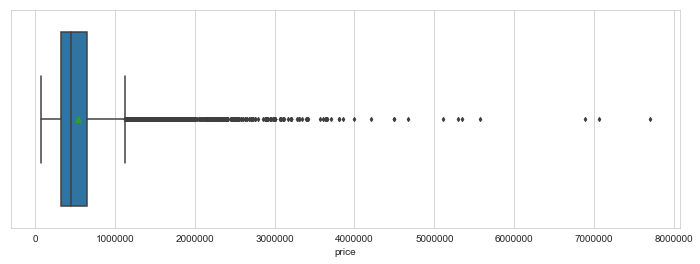

In [20]:
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(x = 'price', data = data, orient = 'h', width = 0.8, 
                 fliersize = 3, showmeans=True, ax = ax)
plt.show()

There seems to be a lot of outliers at the top of the distribution, with a few houses above the 5000000`$`  value. If we ignore outliers, the range is illustrated by the distance between the opposite ends of the whiskers (1.5 IQR) - about 1000000`$` here.
Also, we can see that the right whisker is slightly longer than the left whisker and that the median line is gravitating towards the left of the box. The distribution is therefore slightly skewed to the right.

## 4. Associations and Correlations between Variables

Let's analyze now the relationship between the independent variables available in the dataset and the dependent variable that we are trying to predict (i.e., price).
These analysis should provide some interesting insights for our regression models. 

We'll be using scatterplots and correlations coefficients (e.g., Pearson, Spearman) to explore potential associations between the variables.

### 4.1 Continuous Variables

For example, let's analyze the relationship between the square footage of a house (sqft_living) and its selling price. Since the two variables are measured on a continuous scale, we can use Pearson's coefficient r to measures the strength and direction of the relationship.

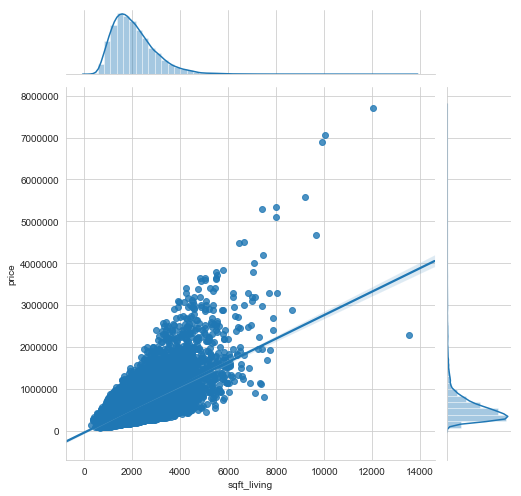

In [21]:
# A joint plot is used to visualize the bivariate distribution
sns.jointplot(x="sqft_living", y="price", data=data, kind = 'reg', size = 7)
plt.show()

There is a clear linear association between the variables (r = 0.7), indicating a strong positive relationship. sqft_living should be a good predicator of house price.
(note: sqft_living distribution is also skewed to the right)

Let's do the same with the 7 remaining continuous variables:

* sqft_lot 
* sqft_above (i.e., sqft_above = sqft_living - sqft_basement)
* sqft_basement
* sqft_living15, the average house square footage of the 15 closest neighbours
* sqft_lot15, the average lot square footage of the 15 closest neighbours
* yr_built
* yr_renovated
* lat
* long

In [14]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;
//First, a simple command to increase the maximum size of the output cells in the notebook

In [15]:
sns.jointplot(x="sqft_lot", y="price", data=data, kind = 'reg', size = 5)
sns.jointplot(x="sqft_above", y="price", data=data, kind = 'reg', size = 5)
sns.jointplot(x="sqft_basement", y="price", data=data, kind = 'reg', size = 5)
sns.jointplot(x="sqft_living15", y="price", data=data, kind = 'reg', size = 5)
sns.jointplot(x="sqft_lot15", y="price", data=data, kind = 'reg', size = 5)
sns.jointplot(x="yr_built", y="price", data=data, kind = 'reg', size = 5)
sns.jointplot(x="yr_renovated", y="price", data=data, kind = 'reg', size = 5)
sns.jointplot(x="lat", y="price", data=data, kind = 'reg', size = 5)
sns.jointplot(x="long", y="price", data=data, kind = 'reg', size = 5)
plt.show()

sqft_lot, sqft_lot15 and yr_built seem to be poorly related to price. 

We can see that there is a lot of zeros in the sqft_basement distribution (i.e., no basement). Similarly, there is a lot of zeros in the yr_renovated variable.

Let's rerun the association tests for these two variables without the zeros.

In [16]:
# Create 2 new columns for the analysis 
data['sqft_basement2'] = data['sqft_basement'].apply(lambda x: x if x > 0 else None)
data['yr_renovated2'] = data['yr_renovated'].apply(lambda x: x if x > 0 else None)

# Show the new plots with paerson correlation
sns.jointplot(x="sqft_basement2", y="price", data=data, kind = 'reg', dropna=True, size = 5)
sns.jointplot(x="yr_renovated2", y="price", data=data, kind = 'reg', dropna=True, size = 5)
plt.show()

The house price is moderately correlated with the size of the basement (if basement present). There is also a small correlation with the year of the renovation (if renovated).

It might be more interesting for our analysis to classify basement and renovation as dichotomous variables (e.g., 0 for no basement, 1 for basement present). Let's create two new columns in our dataset.

In [17]:
data['basement_present'] = data['sqft_basement'].apply(lambda x: 1 if x > 0 else 0)
data['basement_present'] = data['basement_present'].astype('category', ordered = False)

data['renovated'] = data['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)
data['renovated'] = data['renovated'].astype('category', ordered = False)

We will analyse these new variables as categorical (see in few cells below).

But first, let's go back to the plots above and the two variables: sqft_above and sqft_living15. They seem to be strongly related to price. Let's analyse their associations (along with sqft_living) using the pairgrid() function from seaborn. This function creates a matrix of axes and shows the relationship for each pair of the selected variables. 

We will draw the univariate distribution of each variable on the diagonal Axes, and the bivariate distributions using scatterplots on the upper diagonal and kernel density estimation on the lower diagonal. We will create a function to display the paerson coefficient of each pair. 

In [18]:
# define a function to display pearson coefficients on the lower graphs 
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("pearsonr = {:.2f}".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)

g = sns.PairGrid(data, vars = ['sqft_living', 'sqft_living15', 'sqft_above'], size = 3.5) # define the pairgrid
g.map_upper(plt.scatter) 
g.map_diag(sns.distplot)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_lower(corrfunc)
plt.show()

As envisaged, there is a strong positive relationship between the 3 variables (r>0.7). It was kind of obvious for sqft_above which is equal to sqft_livng - sqft_basement. So we know that they both have an impact on price. 

For sqft_living15 however, we are not sure if the relationship with house price is actually due to the average square footage of the 15th closest houses. This is because of the high correlation between sqft_living15 and sqft_living.

To assess the true relationship between price and sqft_living15, we can use the Pearson Partial Correlation test. The correlation can assess the association between two continuous variables whilst controlling for the effect of other continuous variables called covariates. In our example, we will test the relationship between price and sqft_living15 using sqft_living as covariate.

In [19]:
# a Function to returns the sample linear partial correlation coefficients between pairs of variables in C, controlling 
# for the remaining variables in C (clone of Matlab's partialcorr). 
def partial_corr(C):
    C = np.asarray(C)
    p = C.shape[1]
    P_corr = np.zeros((p, p), dtype=np.float)
    for i in range(p):
        P_corr[i, i] = 1
        for j in range(i+1, p):
            idx = np.ones(p, dtype=np.bool)
            idx[i] = False
            idx[j] = False
            beta_i = linalg.lstsq(C[:, idx], C[:, j])[0]
            beta_j = linalg.lstsq(C[:, idx], C[:, i])[0]
            res_j = C[:, j] - C[:, idx].dot( beta_i)
            res_i = C[:, i] - C[:, idx].dot(beta_j)            
            corr = stats.pearsonr(res_i, res_j)[0]
            P_corr[i, j] = corr
            P_corr[j, i] = corr
    return P_corr

# Convert pandas dataframe to a numpy array using only three columns
partial_corr_array = data.as_matrix(columns = ['price', 'sqft_living', 'sqft_living15'])

# Calculate the partial correlation coefficients
partial_corr(partial_corr_array)

We can see now that the average house size of the surrounding
 houses has no effect on the sell price when controlling for the size of the house (r = 0.06). 

### 4.2 Categorical Variables

Let's now analyze the relationship between house price and the categorical variables.

As a first example, we will try to assess if having a waterfront is related to a higher house value. waterfront is a dichotomous variable with underlying continuous distribution (having a waterfront is better that not having a waterfront). We can use a point-biserial correlation coefficient to highlight the relationship between the two variables. 

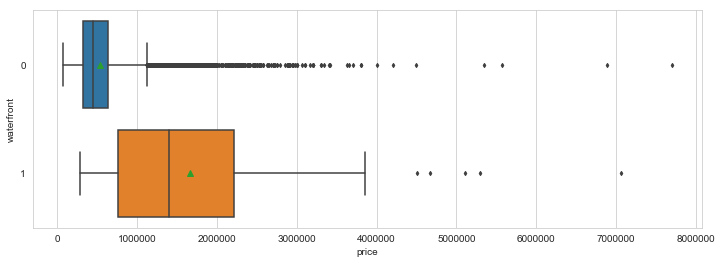

point biserial correlation r is 0.26636943403060215 with p = 0.0


In [22]:
# Let's show boxplots first
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(y = 'waterfront', x = 'price', data = data,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = ax)
plt.show()

# Calculate the correlation coefficient
r, p = stats.pointbiserialr(data['waterfront'], data['price'])
print ('point biserial correlation r is %s with p = %s' %(r,p))

Comments: 

* The no waterfront box plot is comparatively short. This suggests that overall, house prices in this group are very close to each other. 
* The waterfront box plot is comparatively tall. This suggests that house prices differ greatly in this group.
* There is obvious shape differences between the two distributions, suggesting a higher sell price, in general, for houses with a waterfront. This is validated by a positive value of the point-biserial correlation.
* The correlation if however small (r<0.3). Note that we haven't test here the 3 main assumptions of the point-biserial correlation and can't rely too much on the result (1: There should be no significant outliers in the two groups of the dichotomous variable in terms of the continuous variable, 2: There should be homogeneity of variances, 3: The continuous variable should be approximately normally distributed for each group of the dichotomous variable).  

We can run the same test on the basement_present variable and whether or not the house had been renovated in the past.

ValueError: Could not interpret input 'basement_present'

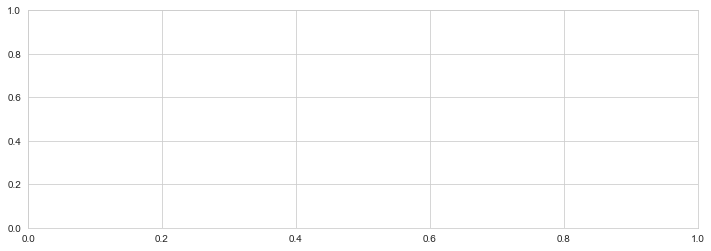

In [23]:
# basement_present variable
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(y = 'basement_present', x = 'price', data = data,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = ax)
plt.show()
r, p = stats.pointbiserialr(data['basement_present'], data['price'])
print ('point biserial correlation r between price and basement_present is %s with p = %s' %(r,p))

# renovated variable
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(y = 'renovated', x = 'price', data = data,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = ax)
print ('')
plt.show()
r, p = stats.pointbiserialr(data['renovated'], data['price'])
print ('point biserial correlation r between price and renovated is %s with p = %s' %(r,p))

Associations exist but they are fairly small (0.1 < r < 0.3). 

Let's move on to our ordinal variables and asses their association with house price. We will show the distribution of the categories of each variable using boxplots.  

In [22]:
fig, axarr = plt.subplots(6, figsize=(12,40))
sns.boxplot(y = 'bedrooms', x = 'price', data = data,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[0])
sns.boxplot(y = 'bathrooms', x = 'price', data = data,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[1])
sns.boxplot(y = 'floors', x = 'price', data = data,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[2])
sns.boxplot(y = 'view', x = 'price', data = data,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[3])
sns.boxplot(y = 'condition', x = 'price', data = data,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[4])
sns.boxplot(y = 'grade', x = 'price', data = data,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[5])
plt.show()

As expected, they all seem to be related to the house price.

We can use the Spearman's rank-order correlation to measure the strength and direction of the relationships between house price and these variables.

In [23]:
r, p = stats.spearmanr(data['bedrooms'], data['price'])
print ('spearman correlation r between price and bedrooms is %s with p = %s' %(r,p))
r, p = stats.spearmanr(data['bathrooms'], data['price'])
print ('spearman correlation r between price and bathrooms is %s with p = %s' %(r,p))
r, p = stats.spearmanr(data['floors'], data['price'])
print ('spearman correlation r between price and floors is %s with p = %s' %(r,p))
r, p = stats.spearmanr(data['view'], data['price'])
print ('spearman correlation r between price and view is %s with p = %s' %(r,p))
r, p = stats.spearmanr(data['condition'], data['price'])
print ('spearman correlation r between price and condition is %s with p = %s' %(r,p))
r, p = stats.spearmanr(data['grade'], data['price'])
print ('spearman correlation r between price and grade is %s with p = %s' %(r,p))

There is indeed associations between these variables and the house price (except for condition). grade seems to be the best indicator.

## Conclusion

In this post, we analyzed the relationship between the output variable (house price) and the dependent variables in our dataset. 

More specifically, we highlighted that:

* sqft_living, sqft_above and sqft_basement were moderately/strongly associated with price. Paerson r was equal to 0.70, 0.61 and 0.41, respectively. The 3 variables were also strongly related to each other as sqft_living = sqft_above and sqft_basement.
* sqft_living15, the average house square footage of the 15 closest neighbors, was also strongly related to price (r = 0.59) . However, when controlling for sqft_living, the relationship disappeared ($r = 0.06$).
* sqft_lot, sqft_lot15 (average lot size of the 15 closest houses) and *yr_built* were poorly related to price.
* The three dichotomous variables (waterfront, basement_present, renovated) were associated with price. The associations were small (r < 0.3)
* Five of the ordinal parameters (bedrooms, bathrooms, floors, views, grade) were also moderately to strongly associated with price.

Our multiple regression analysis models in Part 2 will be built on these results.